In [10]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import log
import pandas as pd

In [11]:
font = {'weight': 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

In [12]:
c = np.array([.1, .01, .001, .0001, .00001]) #concentrations of NaNO3 ions

Ecell = np.array([i * 1000 for i in [.298, .349, .410, .473, .500]]) #convert Ecell in meV

y = np.array([.759, .900, .965, .988, .996]) #activity coefficients

u_K = 76.19 * 10**(-5)# Ionic mobility K+

u_Cl = 79.12 * 10**(-5)# Ionic mobility Cl-

u_Na = 51.93 * 10**(-5)# Ionic mobility Na+

$\alpha_i = \gamma_i c_i$

where $\alpha_i$ is the activity of ion $i$, \
$\gamma_i$ is the individual activity coefficient \
$c_i$ is the concentration of ion $i$ in the standard solution.

In [13]:
df = pd.DataFrame({'c':c, 'y':y, 'Ecell': Ecell})
df['a'] = df['c'] * df['y']
df['pNO3'] = - np.log10(df['a'])
df['-lg(c)']= - np.log10(df['c'])
pNO3 = df['pNO3']

In [14]:
df

,c,y,Ecell,a,pNO3,-lg(c)
0,0.10000,0.759,298.0,0.075900,1.119758,1.0
1,0.01000,0.900,349.0,0.009000,2.045757,2.0
2,0.00100,0.965,410.0,0.000965,3.015473,3.0
3,0.00010,0.988,473.0,0.000099,4.005243,4.0
4,0.00001,0.996,500.0,0.000010,5.001741,5.0


## 2.5 Plot a calibration curve of $E_{cell}$ vs. $pNO_{3}$ and find its linearity range. Determine the slope of the curve and compare it to a theoretical value for a single-charge ion per decade.

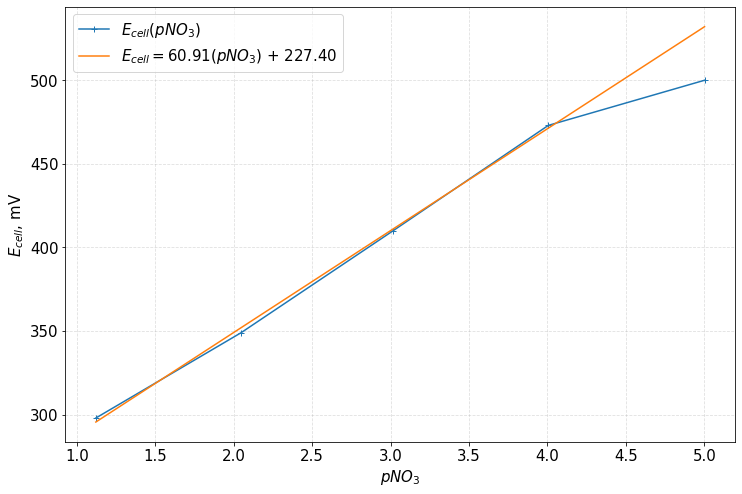

In [15]:
plt.figure(figsize=(12,8))
plt.grid(alpha=.4,linestyle='--')


plt.ylabel(r'$E_{cell}$, mV')
plt.xlabel(r'$pNO_{3}$')


m, b = np.polyfit(pNO3[:4], Ecell[:4], 1)  # m = slope, b=intercept


plt.plot(pNO3, Ecell,'-+', label=r'$E_{cell}(pNO_{3})$')  # create scatter plot

plt.plot(pNO3, m*pNO3 + b, '-', label=r'$E_{cell}=$' f'{m:.2f}' + r'$(pNO_{3})$' + f' + {b:.2f}')

plt.legend()

## 2.6. Evaluate the detection limit (DL) for the nitrate ion.
From the curve above the detection limit (DL) for $NO_3^-$ ions is up to $10^{-4} M$

$1/0.006*(0.497 - 0.349) - 0.5 * lg(0.009)$

In [16]:
(1/59.11)*(0.497 - 0.349) - 0.5 * np.log10(0.009000)

1.0253825517428652

In [17]:
16.91*(0.497 - 0.349)+(0.5)*np.log10(0.009)

1.4798012547196626

In [18]:
3.365*10**3

3365.0

In [19]:
u_Na = 5.19 * 10**(-8)
u_Cl = 7.92 * 10**(-8)
u_NO3 = 7.41 * 10**(-8)

lam_Na = 50.08
lam_NO3 = 71.42
lam_Cl = 76.31
concentration_range = [10**i for i in range(-1, -6, -1)]
R = 8.314
F = 96485
T = 298
c_sol = 0.1
E_d = []

In [20]:
E_d_NaCl = [-1.01306, -12.68296, -24.784655, -37.02196, -49.285962] # mV, diffusion potential 0.1 NaCl

E_d_KCl = [-1.601754725, -2.9828024, -4.141730626, -5.26444529, -6.382096929] # mV diffusion potential 4.2 KCl

In [21]:
df['E_d_NaCl'] = E_d_NaCl
df['E_d_KCl'] = E_d_KCl
df['E_new'] = df['Ecell'] + df['E_d_NaCl'] - df['E_d_KCl'] - 82

In [22]:
df

,c,y,Ecell,a,pNO3,-lg(c),E_d_NaCl,E_d_KCl,E_new
0,0.10000,0.759,298.0,0.075900,1.119758,1.0,-1.013060,-1.601755,216.588695
1,0.01000,0.900,349.0,0.009000,2.045757,2.0,-12.682960,-2.982802,257.299842
2,0.00100,0.965,410.0,0.000965,3.015473,3.0,-24.784655,-4.141731,307.357076
3,0.00010,0.988,473.0,0.000099,4.005243,4.0,-37.021960,-5.264445,359.242485
4,0.00001,0.996,500.0,0.000010,5.001741,5.0,-49.285962,-6.382097,375.096135


In [23]:
for i in df.E_new:
    print(f'{i:.3f}')

216.589
257.300
307.357
359.242
375.096


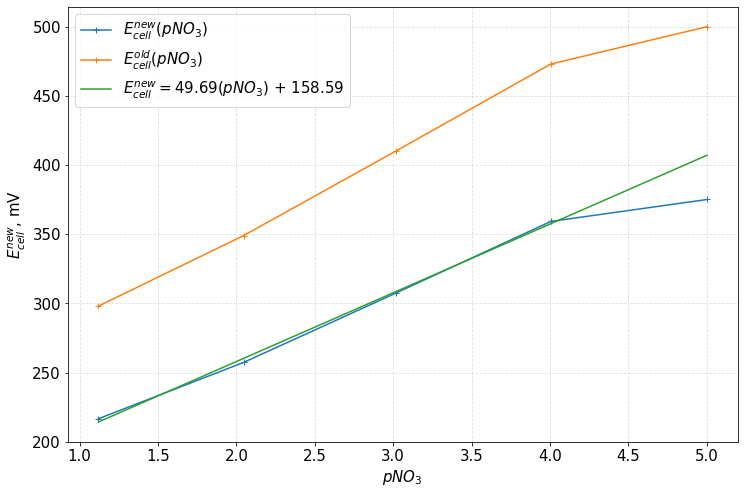

In [24]:
plt.figure(figsize=(12,8))
plt.grid(alpha=.4,linestyle='--')


plt.ylabel(r'$E^{new}_{cell}$, mV')
plt.xlabel(r'$pNO_{3}$')


m, b = np.polyfit(pNO3[:4], df['E_new'][:4], 1)  # m = slope, b=intercept


plt.plot(pNO3, df['E_new'],'-+', label=r'$E^{new}_{cell}(pNO_{3})$')  # create scatter plot
plt.plot(pNO3, Ecell,'-+', label=r'$E^{old}_{cell}(pNO_{3})$')
plt.plot(pNO3, m*pNO3 + b, '-', label=r'$E^{new}_{cell}=$' f'{m:.2f}' + r'$(pNO_{3})$' + f' + {b:.2f}')

plt.legend()   